# **TikTok Project**
**Course 6 - The Nuts and bolts of machine learning**

Recall that you are a data professional at TikTok. Your supervisor was impressed with the work you have done and has requested that you build a machine learning model that can be used to determine whether a video contains a claim or whether it offers an opinion. With a successful prediction model, TikTok can reduce the backlog of user reports and prioritize them more efficiently.

A notebook was structured and prepared to help you in this project. A notebook was structured and prepared to help you in this project. Please complete the following questions.

# **Course 6 End-of-course project: Classifying videos using machine learning**

In this activity, you will practice using machine learning techniques to predict on a binary outcome variable.
<br/>

**The purpose** of this model is to increase response time and system efficiency by automating the initial stages of the claims process.

**The goal** of this model is to predict whether a TikTok video presents a "claim" or presents an "opinion".
<br/>

*This activity has three parts:*

**Part 1:** Ethical considerations
* Consider the ethical implications of the request

* Should the objective of the model be adjusted?

**Part 2:** Feature engineering

* Perform feature selection, extraction, and transformation to prepare the data for modeling

**Part 3:** Modeling

* Build the models, evaluate them, and advise on next steps

Follow the instructions and answer the questions below to complete the activity. Then, you will complete an Executive Summary using the questions listed on the PACE Strategy Document.

Be sure to complete this activity before moving on. The next course item will provide you with a completed exemplar to compare to your own work.



# **Classify videos using machine learning**

<img src="images/Pace.png" width="100" height="100" align=left>

# **PACE stages**


Throughout these project notebooks, you'll see references to the problem-solving framework PACE. The following notebook components are labeled with the respective PACE stage: Plan, Analyze, Construct, and Execute.

<img src="images/Plan.png" width="100" height="100" align=left>


## **PACE: Plan**

Consider the questions in your PACE Strategy Document to reflect on the Plan stage.

In this stage, consider the following questions:


1.   **What are you being asked to do? What metric should I use to evaluate success of my business/organizational objective?**

2.   **What are the ethical implications of the model? What are the consequences of your model making errors?**
  *   What is the likely effect of the model when it predicts a false negative (i.e., when the model says a video does not contain a claim and it actually does)?

  *   What is the likely effect of the model when it predicts a false positive (i.e., when the model says a video does contain a claim and it actually does not)?

3.   **How would you proceed?**


==> ENTER YOUR RESPONSES HERE

### **Task 1. Imports and data loading**

Start by importing packages needed to build machine learning models to achieve the goal of this project.

In [31]:
import numpy as np
import pandas as pd

# Import packages for data visualization

import matplotlib.pyplot as plt
import seaborn as sns

# Import packages for data preprocessing
from sklearn.preprocessing import normalize,StandardScaler,OneHotEncoder
import sklearn.metrics as metrics
from sklearn.model_selection import train_test_split,GridSearchCV


# Import packages for data modeling
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from xgboost import plot_importance



Now load the data from the provided csv file into a dataframe.

**Note:** As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [2]:
# Load dataset into dataframe
data = pd.read_csv("tiktok_dataset.csv")

<img src="images/Analyze.png" width="100" height="100" align=left>

## **PACE: Analyze**

Consider the questions in your PACE Strategy Document to reflect on the Analyze stage.

### **Task 2: Examine data, summary info, and descriptive stats**

Inspect the first five rows of the dataframe.

In [4]:
# Display first few rows
data.head(10)

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0
5,6,claim,8972200955,35,someone shared with me that gross domestic pro...,not verified,under review,336647.0,175546.0,62303.0,4293.0,1857.0
6,7,claim,4958886992,16,someone shared with me that elvis presley has ...,not verified,active,750345.0,486192.0,193911.0,8616.0,5446.0
7,8,claim,2270982263,41,someone shared with me that the best selling s...,not verified,active,547532.0,1072.0,50.0,22.0,11.0
8,9,claim,5235769692,50,someone shared with me that about half of the ...,not verified,active,24819.0,10160.0,1050.0,53.0,27.0
9,10,claim,4660861094,45,someone shared with me that it would take a 50...,verified,active,931587.0,171051.0,67739.0,4104.0,2540.0


Get the number of rows and columns in the dataset.

In [5]:
# Get number of rows and columns

data.shape

(19382, 12)

Get the data types of the columns.

In [8]:
# Get data types of columns
data.dtypes

#                             int64
claim_status                 object
video_id                      int64
video_duration_sec            int64
video_transcription_text     object
verified_status              object
author_ban_status            object
video_view_count            float64
video_like_count            float64
video_share_count           float64
video_download_count        float64
video_comment_count         float64
dtype: object

Get basic information about the dataset.

In [7]:
# Get basic information

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19382 entries, 0 to 19381
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   #                         19382 non-null  int64  
 1   claim_status              19084 non-null  object 
 2   video_id                  19382 non-null  int64  
 3   video_duration_sec        19382 non-null  int64  
 4   video_transcription_text  19084 non-null  object 
 5   verified_status           19382 non-null  object 
 6   author_ban_status         19382 non-null  object 
 7   video_view_count          19084 non-null  float64
 8   video_like_count          19084 non-null  float64
 9   video_share_count         19084 non-null  float64
 10  video_download_count      19084 non-null  float64
 11  video_comment_count       19084 non-null  float64
dtypes: float64(5), int64(3), object(4)
memory usage: 1.8+ MB


Generate basic descriptive statistics about the dataset.

In [9]:
# Generate basic descriptive stats

data.describe()

,#,video_id,video_duration_sec,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
count,19382.000000,1.938200e+04,19382.000000,19084.000000,19084.000000,19084.000000,19084.000000,19084.000000
mean,9691.500000,5.627454e+09,32.421732,254708.558688,84304.636030,16735.248323,1049.429627,349.312146
std,5595.245794,2.536440e+09,16.229967,322893.280814,133420.546814,32036.174350,2004.299894,799.638865
min,1.000000,1.234959e+09,5.000000,20.000000,0.000000,0.000000,0.000000,0.000000
25%,4846.250000,3.430417e+09,18.000000,4942.500000,810.750000,115.000000,7.000000,1.000000
50%,9691.500000,5.618664e+09,32.000000,9954.500000,3403.500000,717.000000,46.000000,9.000000
75%,14536.750000,7.843960e+09,47.000000,504327.000000,125020.000000,18222.000000,1156.250000,292.000000
max,19382.000000,9.999873e+09,60.000000,999817.000000,657830.000000,256130.000000,14994.000000,9599.000000


Check for and handle missing values.

In [10]:
# Check for missing values
data.isna().sum()


#                             0
claim_status                298
video_id                      0
video_duration_sec            0
video_transcription_text    298
verified_status               0
author_ban_status             0
video_view_count            298
video_like_count            298
video_share_count           298
video_download_count        298
video_comment_count         298
dtype: int64

In [3]:
# Drop rows with missing values

data.dropna(inplace=True)

In [13]:

# Display first few rows after handling missing values

data.isna().sum()

#                           0
claim_status                0
video_id                    0
video_duration_sec          0
video_transcription_text    0
verified_status             0
author_ban_status           0
video_view_count            0
video_like_count            0
video_share_count           0
video_download_count        0
video_comment_count         0
dtype: int64

Check for and handle duplicates.

In [15]:
# Check for duplicates
data.duplicated().sum()

0

Check for and handle outliers.

Tree based models are robust to outliers therefore there is no need to handle outliers 

Check class balance.

In [19]:
# Check class balance
data['claim_status'].value_counts(normalize=True)

claim_status
claim      0.503458
opinion    0.496542
Name: proportion, dtype: float64

<img src="images/Construct.png" width="100" height="100" align=left>

## **PACE: Construct**
Consider the questions in your PACE Strategy Document to reflect on the Construct stage.

### **Task 3: Feature engineering**

Extract the length of each `video_transcription_text` and add this as a column to the dataframe, so that it can be used as a potential feature in the model.

In [4]:
# Extract the length of each `video_transcription_text` and add this as a column to the dataframe

data['text_length'] = data.video_transcription_text.str.len()
data

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,text_length
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0,97
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0,107
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0,137
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0,131
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0,128
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19079,19080,opinion,1492320297,49,in our opinion the earth holds about 11 quinti...,not verified,active,6067.0,423.0,81.0,8.0,2.0,65
19080,19081,opinion,9841347807,23,in our opinion the queens in ant colonies live...,not verified,active,2973.0,820.0,70.0,3.0,0.0,66
19081,19082,opinion,8024379946,50,in our opinion the moon is moving away from th...,not verified,active,734.0,102.0,7.0,2.0,1.0,53
19082,19083,opinion,7425795014,8,in our opinion lightning strikes somewhere on ...,not verified,active,3394.0,655.0,123.0,11.0,4.0,80


Calculate the average text_length for claims and opinions.

In [27]:
# Calculate the average text_length for claims and opinions
data.groupby('claim_status')[['text_length']].mean()

,text_length
claim_status,
claim,95.376978
opinion,82.722562


Visualize the distribution of `text_length` for claims and opinions.

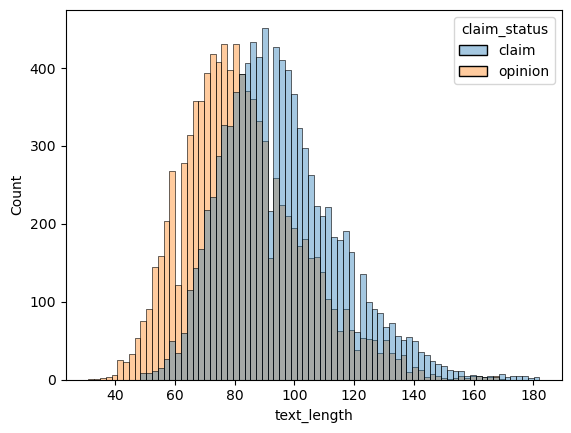

In [8]:
# Visualize the distribution of `text_length` for claims and opinions

sns.histplot(data=data,x='text_length',hue='claim_status',alpha=0.4)
plt.show()

**Feature selection and transformation**

Encode target and catgorical variables.

In [9]:
X = data.copy()
# Drop unnecessary columns
X = X.drop(['#', 'video_id'], axis=1)
# Encode target variable
X['claim_status'] = X['claim_status'].replace({'opinion': 0, 'claim': 1})
# Dummy encode remaining categorical values
X = pd.get_dummies(X,
                   columns=['verified_status', 'author_ban_status'],
                   drop_first=True)
X.head()

,claim_status,video_duration_sec,video_transcription_text,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,text_length,verified_status_verified,author_ban_status_banned,author_ban_status_under review
0,1,59,someone shared with me that drone deliveries a...,343296.0,19425.0,241.0,1.0,0.0,97,False,False,True
1,1,32,someone shared with me that there are more mic...,140877.0,77355.0,19034.0,1161.0,684.0,107,False,False,False
2,1,31,someone shared with me that american industria...,902185.0,97690.0,2858.0,833.0,329.0,137,False,False,False
3,1,25,someone shared with me that the metro of st. p...,437506.0,239954.0,34812.0,1234.0,584.0,131,False,False,False
4,1,19,someone shared with me that the number of busi...,56167.0,34987.0,4110.0,547.0,152.0,128,False,False,False


### **Task 4: Split the data**

Assign target variable.

In [6]:
# Isolate target variable
y = X['claim_status']


Isolate the features.

In [10]:
# Isolate features
X  =X.drop(columns=['claim_status','video_transcription_text'])
# Display first few rows of features dataframe
X.head()

,video_duration_sec,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,text_length,verified_status_verified,author_ban_status_banned,author_ban_status_under review
0,59,343296.0,19425.0,241.0,1.0,0.0,97,False,False,True
1,32,140877.0,77355.0,19034.0,1161.0,684.0,107,False,False,False
2,31,902185.0,97690.0,2858.0,833.0,329.0,137,False,False,False
3,25,437506.0,239954.0,34812.0,1234.0,584.0,131,False,False,False
4,19,56167.0,34987.0,4110.0,547.0,152.0,128,False,False,False


#### **Task 5: Create train/validate/test sets**

Split data into training and testing sets, 80/20.

In [11]:
# Split the data into training and testing sets
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

Split the training set into training and validation sets, 75/25, to result in a final ratio of 60/20/20 for train/validate/test sets.

In [12]:
X_th,X_val,y_th,y_val = train_test_split(X_train,y_train,test_size=0.25,random_state=0)

Confirm that the dimensions of the training, validation, and testing sets are in alignment.

In [13]:
# Get shape of each training, validation, and testing set
sets = [X_train,X_test,X_th,X_val,y_train,y_test,y_th,y_val]
shapes = [s.shape for s in sets]
shapes

[(15267, 10),
 (3817, 10),
 (11450, 10),
 (3817, 10),
 (15267,),
 (3817,),
 (11450,),
 (3817,)]

### **Task 6. Build models**


### **Build a random forest model**

Fit a random forest model to the training set. Use cross-validation to tune the hyperparameters and select the model that performs best on recall.

In [17]:
# Instantiate the random forest classifier
rf = RandomForestClassifier()

# Create a dictionary of hyperparameters to tune
# cv_params = {'max_depth': [5, 7, None],
#              'max_features': [0.3, 0.6],
#             #  'max_features': 'auto'
#              'max_samples': [0.7],
#              'min_samples_leaf': [1,2],
#              'min_samples_split': [2,3],
#              'n_estimators': [75,100,200],
#              }

cv_params = {'max_depth': [ 7],
             'max_features': [ 0.6],
            #  'max_features': 'auto'
             'max_samples': [0.7],
             'min_samples_leaf': [2],
             'min_samples_split': [2],
             'n_estimators': [100],
             }

# Define a dictionary of scoring metrics to capture
scoring = {'accuracy', 'precision', 'recall', 'f1'}

# Instantiate the GridSearchCV object
rf_cv = GridSearchCV(rf,param_grid=cv_params,cv=5,scoring=scoring,refit='f1')


In [18]:
%%time
rf_cv.fit(X_train, y_train)

CPU times: user 6.36 s, sys: 9.17 ms, total: 6.37 s
Wall time: 6.37 s


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [7], 'max_features': [0.6],
                         'max_samples': [0.7], 'min_samples_leaf': [2],
                         'min_samples_split': [2], 'n_estimators': [100]},
             refit='f1', scoring={'recall', 'accuracy', 'f1', 'precision'})

In [19]:
  # Get all the results from the CV and put them in a df
df = pd.DataFrame(rf_cv.cv_results_)

  # Isolate the row of the df with the max(mean precision score)

random_forest_classifier = df[df['mean_test_precision']==df['mean_test_precision'].max()]
random_forest_classifier

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_features,param_max_samples,param_min_samples_leaf,param_min_samples_split,param_n_estimators,...,std_test_f1,rank_test_f1,split0_test_precision,split1_test_precision,split2_test_precision,split3_test_precision,split4_test_precision,mean_test_precision,std_test_precision,rank_test_precision
0,0.994652,0.01963,0.036558,0.000305,7,0.6,0.7,2,2,100,...,0.001276,1,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1


In [20]:
# Examine best parameters
### YOUR CODE HERE ###
rf_cv.best_params_

{'max_depth': 7,
 'max_features': 0.6,
 'max_samples': 0.7,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 100}

**Question:** How well is your model performing? Consider average recall score and precision score.

### **Build an XGBoost model**

In [21]:
# Instantiate the XGBoost classifier

xgb =XGBClassifier(objective='binary:logistic', random_state=0)

# Create a dictionary of hyperparameters to tune
# cv_params = {'max_depth': [4,8,12],
#              'min_child_weight': [3, 5],
#              'learning_rate': [0.01, 0.1],
#              'n_estimators': [300, 500]
#              }

#For faster training
cv_params = {'max_depth': [4,],
             'min_child_weight': [5],
             'learning_rate': [ 0.1],
             'n_estimators': [300,]
             }



# Define a dictionary of scoring metrics to capture
scoring = {'accuracy', 'precision', 'recall', 'f1'}

# Instantiate the GridSearchCV object
xgb_cv = GridSearchCV(xgb, cv_params, scoring=scoring, cv=5, refit='recall')

In [22]:
%%time
xgb_cv.fit(X_train, y_train)

CPU times: user 30min 30s, sys: 2.15 s, total: 30min 32s
Wall time: 15min 28s


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=0, ...),
             param_grid={'learning_rate': [0.1], 'max_depth': [4],
                         'min_child_weight': [5], 'n_estimators': [300]},
             refit='recall', scoring={'recall', 'accuracy', 'f1', 'precision'})

In [24]:
  # Get all the results from the CV and put them in a df
df2 = pd.DataFrame(xgb_cv.cv_results_)

  # Isolate the row of the df with the max(mean precision score)
xgb_classifier = df[df['mean_test_precision']==df['mean_test_precision'].max()]
xgb_classifier

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_features,param_max_samples,param_min_samples_leaf,param_min_samples_split,param_n_estimators,...,std_test_f1,rank_test_f1,split0_test_precision,split1_test_precision,split2_test_precision,split3_test_precision,split4_test_precision,mean_test_precision,std_test_precision,rank_test_precision
0,0.994652,0.01963,0.036558,0.000305,7,0.6,0.7,2,2,100,...,0.001276,1,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1


**Question:** How well does your model perform? Consider recall score and precision score.

<img src="images/Execute.png" width="100" height="100" align=left>

## **PACE: Execute**
Consider the questions in your PACE Strategy Document to reflect on the Execute stage.

### **Task 7. Evaluate model**

Evaluate models against validation criteria.

#### **Random forest**

In [27]:
# Use the random forest "best estimator" model to get predictions on the encoded testing set
y_pred_rf = rf_cv.best_estimator_.predict(X_val)

Display the predictions on the encoded testing set.

In [28]:
# Display the predictions on the encoded testing set
y_pred_rf

array([1, 0, 1, ..., 1, 1, 1])

Display the true labels of the testing set.

In [29]:
# Display the true labels of the testing set
y_val

5846     1
12058    0
2975     1
8432     1
6863     1
        ..
6036     1
6544     1
2781     1
6426     1
4450     1
Name: claim_status, Length: 3817, dtype: int64

Create a confusion matrix to visualize the results of the classification model.

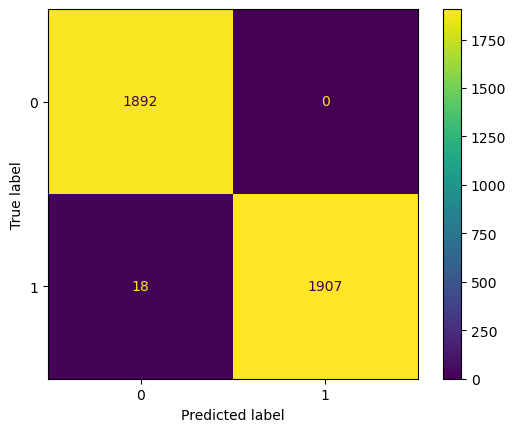

In [34]:
# Create a confusion matrix to visualize the results of the classification model

# Compute values for confusion matrix

cm_rf = metrics.confusion_matrix(y_val,y_pred_rf)

# Create display of confusion matrix
disp = metrics.ConfusionMatrixDisplay(cm_rf,)

# Plot confusion matrix

# Display plot
disp.plot()


Create a classification report that includes precision, recall, f1-score, and accuracy metrics to evaluate the performance of the model.

In [36]:
# Create a classification report
# Create classification report for random forest model
evaluation_metrics = [metrics.accuracy_score,metrics.precision_score,metrics.recall_score,metrics.f1_score]

for metric in evaluation_metrics:
    print(f"{metric.__name__}: {metric(y_val,y_pred_rf)}")


accuracy_score: 0.9952842546502488
precision_score: 1.0
recall_score: 0.9906493506493507
f1_score: 0.9953027139874738


**Question:** What does your classification report show? What does the confusion matrix indicate?

#### **XGBoost**

In [38]:
#Evaluate XGBoost model

y_pred_xgb = xgb_cv.best_estimator_.predict(X_val)


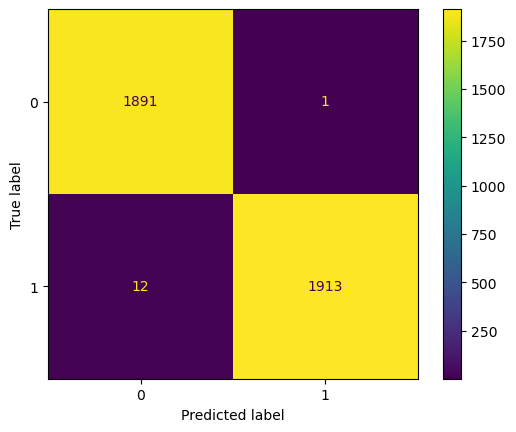

In [39]:
# Compute values for confusion matrix
cm = metrics.confusion_matrix(y_val,y_pred_xgb,)

# Create display of confusion matrix
disp = metrics.ConfusionMatrixDisplay(cm,)

# Plot confusion matrix
disp.plot()


In [40]:
# Create a classification report

evaluation_metrics = [metrics.accuracy_score,metrics.precision_score,metrics.recall_score,metrics.f1_score]

for metric in evaluation_metrics:
    print(f"{metric.__name__}: {metric(y_val,y_pred_xgb)}")

accuracy_score: 0.9965941839140686
precision_score: 0.9994775339602926
recall_score: 0.9937662337662337
f1_score: 0.9966137014847616


**Question:** Describe your XGBoost model results. How does your XGBoost model compare to your random forest model?

XGBoost performs less in precision and recall. We use Random Forest as the champion model as it has a perfect precision score

### **Use champion model to predict on test data**

In [41]:
### YOUR CODE HERE ###
y_pred = rf_cv.best_estimator_.predict(X_test)


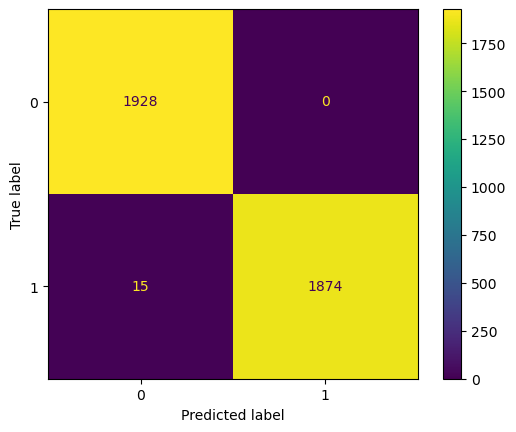

In [43]:
cm_champ = metrics.confusion_matrix(y_test,y_pred)

# Create display of confusion matrix
disp = metrics.ConfusionMatrixDisplay(cm_champ,)

# Plot confusion matrix

# Display plot
disp.plot()




#### **Feature importances of champion model**


<Axes: >

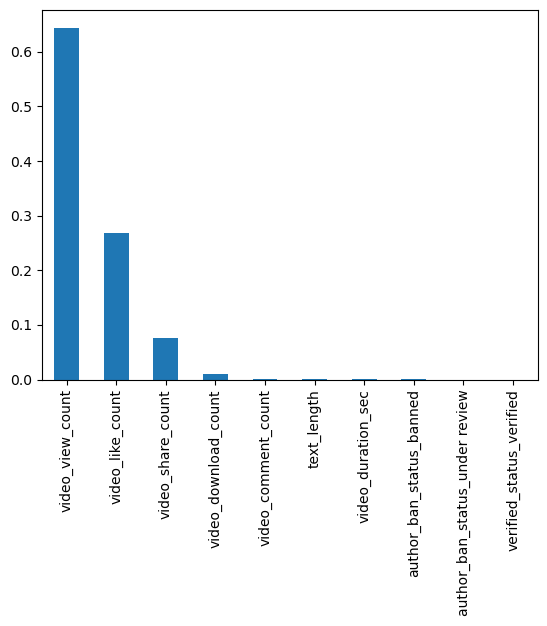

In [61]:
importance = rf_cv.best_estimator_.feature_importances_
importance = pd.Series(importance,index = X_test.columns).sort_values(ascending=False)
importance.plot.bar()


**Question:** Describe your most predictive features. Were your results surprising?

The most predictive features where video_view_count,video_like_count and video_share_count. These are related to customer engagement and are not surprising. 

### **Task 8. Conclusion**

In this step use the results of the models above to formulate a conclusion. Consider the following questions:

1. **Would you recommend using this model? Why or why not?**

2. **What was your model doing? Can you explain how it was making predictions?**

3. **Are there new features that you can engineer that might improve model performance?**

4. **What features would you want to have that would likely improve the performance of your model?**

Remember, sometimes your data simply will not be predictive of your chosen target. This is common. Machine learning is a powerful tool, but it is not magic. If your data does not contain predictive signal, even the most complex algorithm will not be able to deliver consistent and accurate predictions. Do not be afraid to draw this conclusion.


1. Since the model performed well on both training and validation set it can be recommended. 
2. According to the model metrics it was performing well. It made predictions mostly on the user engagement. 
3. Since the model is performing nearly perfect,there is no need to engineer features to improve the model.
4. As the model is doing great, it need no additional features to improve performance. Even if some features are added the improvement in performance is negligible. 

**Congratulations!** You've completed this lab. However, you may not notice a green check mark next to this item on Coursera's platform. Please continue your progress regardless of the check mark. Just click on the "save" icon at the top of this notebook to ensure your work has been logged.